<a href="https://colab.research.google.com/github/esrayuzgec/parkinsonvsalz/blob/main/ADCN_VGG16_TRAIN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
!pip install timm
import timm
from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
path = Path('/content/gdrive/MyDrive/ALZ-KONTROL')

In [4]:
all_files= get_image_files(path)

In [5]:
from fastai.vision.augment import contrast
tfms = aug_transforms(size=256, 
                      min_scale=0.05,
                    
                      max_zoom=0.00,
                      max_lighting=0.70,
                      p_lighting=0.60
                      
                      )

In [6]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=RandomSplitter(valid_pct=0.1),
                 get_y=parent_label,
                 item_tfms=Resize(256,method='squish'),
                 batch_tfms=Normalize.from_stats(*imagenet_stats)
                 
                 
                 
)

In [7]:
dls= dblock.dataloaders(all_files,bs=32)


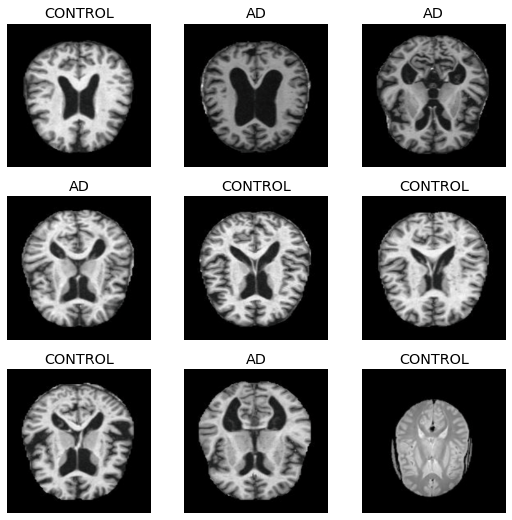

In [8]:
dls.show_batch()


In [9]:
print("Number of examples in testing:", len(dls.valid_ds))


Number of examples in testing: 687


In [10]:
learn = vision_learner(dls, vgg16,metrics=accuracy)


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.02290867641568184)

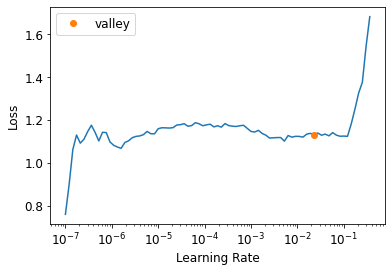

In [11]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(100,1.1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.701742,0.439969,0.787482,01:12
1,0.579942,0.381756,0.831150,01:12
2,0.471617,0.344307,0.851528,01:12
3,0.428213,0.355555,0.826783,01:13
4,0.408856,0.326785,0.860262,01:12
5,0.369617,0.398677,0.809316,01:12
6,0.409139,0.386845,0.831150,01:12
7,0.390535,0.341225,0.852984,01:12
8,0.395963,0.336043,0.848617,01:12
9,0.374425,0.299815,0.870451,01:12


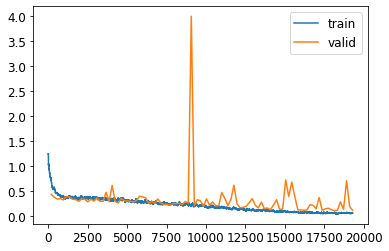

In [14]:
learn.recorder.plot_loss()

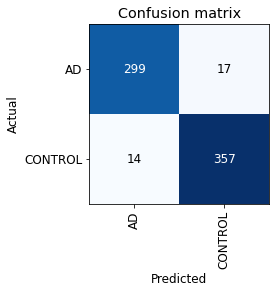

In [15]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [16]:
learn.save(path/'ADCNvgg16_train1')

Path('/content/gdrive/MyDrive/ALZ-KONTROL/ADCNvgg16_train1.pth')

In [17]:
learn.export(path/'ADCNvgg16_train1.pkl')

In [18]:
interp.print_classification_report()


              precision    recall  f1-score   support

          AD       0.96      0.95      0.95       316
     CONTROL       0.95      0.96      0.96       371

    accuracy                           0.95       687
   macro avg       0.95      0.95      0.95       687
weighted avg       0.95      0.95      0.95       687



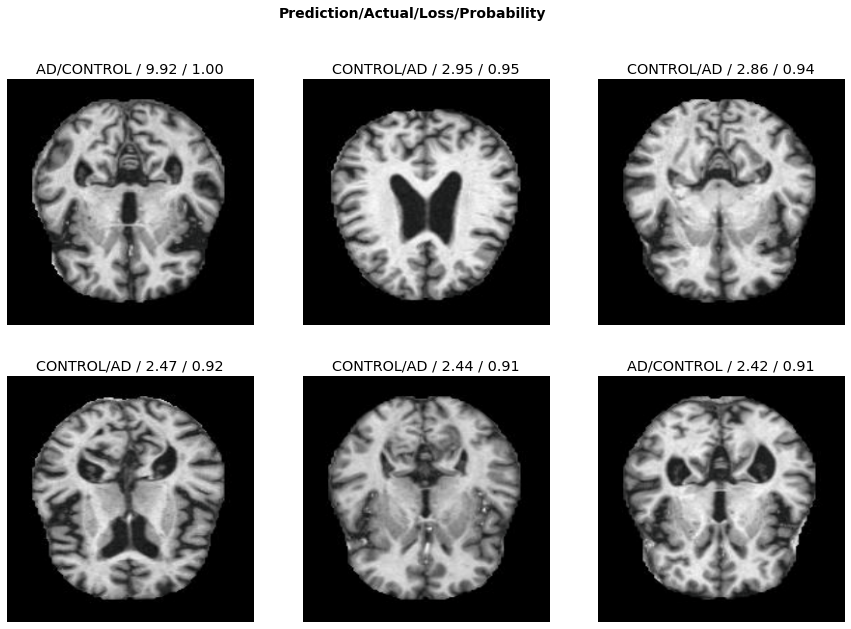

In [19]:
interp.plot_top_losses(6, figsize=(15,10))


In [20]:
all_files= get_image_files(path)


In [25]:


dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                 get_y=parent_label,
                 item_tfms=Resize(256,method='squish'),
                 batch_tfms=Normalize.from_stats(*imagenet_stats)
)
                 
                 

In [26]:
dls_test = dblock.dataloaders(all_files)


In [27]:
print("Number of examples in testing:", len(dls_test.valid_ds))

Number of examples in testing: 1301


In [29]:
learn1 = vision_learner(dls_test, vgg16, metrics=accuracy).load('/content/gdrive/MyDrive/ALZ-KONTROL/ADCNvgg16_train1')


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


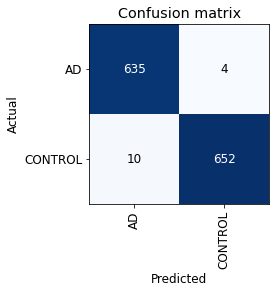

In [30]:

interp= ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()
     

In [31]:

preds, targs = learn1.tta()
accuracy(preds, targs).item()

0.9892390370368958

In [32]:
losses,idxs = interp.top_losses(10)
print(idxs)     

TensorBase([1121, 1199,  948,   79, 1085,   85,  867, 1097, 1013,  308])
